In [1]:
#Importing required modules for the notebook
import pandas as pd 
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [19]:
#Importing the dataset containing totaal 311 calls and demographic characterisitics
#per each NYCNTA merged
dataset_2014=pd.read_csv("Demographics and 311 calls merged by NTA - Normalized.csv")

In [20]:
#Importing the NTA a pluto data
NTAPluto = pd.read_excel('nta_pluto_join.xls')

In [21]:
#Displaying the head of the data imported as a panda dataframe
dataset_2014.head()

,Neighborhood,Normalized 311 calls,Median House Value,Median Age,Median Rent,Median Income,Normalized cars,Normalized High school,Normalized bachelors,Normalized masters,...,Normalized non-family household,Normalized owner ocuppied,Normalized renter ocuppied,Total Population,Total households,Normalized white only,Normalized black only,Normalized asian only,Normalized hispanic only,Normalized other only
0,Airport,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Allerton-Pelham Gardens,0.139654,445200.0,39.70,1538.0,64702.0,1.129863,170.556606,103.757977,52.558497,...,0.229895,0.601616,0.398384,33848.0,9587.0,0.259543,0.312987,0.084850,0.314140,0.028480
2,Annadale-Huguenot-Prince's Bay-Eltingville,0.169064,527900.0,41.60,1342.0,91354.5,1.858472,210.446054,145.184210,57.879597,...,0.201214,0.840965,0.159035,28853.0,9885.0,0.895262,0.005233,0.029598,0.063078,0.006828
3,Arden Heights,0.147098,409750.0,40.45,1299.0,88864.5,1.741741,188.149363,152.136552,69.603937,...,0.202344,0.908014,0.091986,25602.0,8960.0,0.796071,0.014140,0.062690,0.118741,0.008359
4,Astoria,0.184188,637150.0,34.10,1432.0,57798.0,0.422238,141.163500,217.835138,89.772359,...,0.532469,0.170327,0.829673,77095.0,34310.0,0.513911,0.046112,0.139724,0.274998,0.025255


In [22]:
#Displaying the head of the data imported as a panda dataframe
NTAPluto.head()

,FID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Sum_LotAre,Sum_BldgAr,Sum_ComAre,Sum_ResAre,Sum_Office,Sum_Retail,Sum_Garage,Sum_StrgeA,Sum_Factry,Sum_OtherA
0,0,3,Brooklyn,47,BK88,Borough Park,36163605,54306199,13848210,40405004,2488184,2550614,757557,464733,1082565,6390713
1,1,4,Queens,81,QN52,East Flushing,20011124,12102299,1443427,10658872,257161,279618,42439,64517,8680,782840
2,2,4,Queens,81,QN48,Auburndale,22170145,11520594,1758175,9762419,411669,417668,102462,29595,900,795207
3,3,4,Queens,81,QN51,Murray Hill,35471234,26070557,3890748,22123302,509736,1113425,339480,169704,58325,1698475
4,4,4,Queens,81,QN27,East Elmhurst,13103854,8732830,1719240,7013590,80632,288334,453793,58115,43115,793543


In [23]:
len(NTAPluto)

195

In [24]:
#Lenght of the dataframe (according to the number of NTA's)
len(dataset_2014)

195

In [25]:
#Importing the data set as a panda dataframe without NA to work
#with sklearn modules and pronting the new lenght of the Dataframe
dataset_2014_=pd.read_csv("Demographics and 311 calls merged by NTA - Normalized.csv").dropna()
len(dataset_2014_)

190

100 rows lost when dropping nan values

In [26]:
#Normalizing pluto areas by NTA
NTAPluto['Normalized Com Area'] = NTAPluto['Sum_ComAre']/NTAPluto['Sum_BldgAr']
NTAPluto['Normalized Res Area'] = NTAPluto['Sum_ResAre']/NTAPluto['Sum_BldgAr']
NTAPluto['Normalized Off Area'] = NTAPluto['Sum_Office']/NTAPluto['Sum_BldgAr']
NTAPluto['Normalized Ret Area'] = NTAPluto['Sum_Retail']/NTAPluto['Sum_BldgAr']

In [27]:
NTAPluto['Neighborhood'] = NTAPluto['NTAName']

In [28]:
NTAPluto.columns

Index([                u'FID',            u'BoroCode',            u'BoroName',
                u'CountyFIPS',             u'NTACode',             u'NTAName',
                u'Sum_LotAre',          u'Sum_BldgAr',          u'Sum_ComAre',
                u'Sum_ResAre',          u'Sum_Office',          u'Sum_Retail',
                u'Sum_Garage',          u'Sum_StrgeA',          u'Sum_Factry',
                u'Sum_OtherA', u'Normalized Com Area', u'Normalized Res Area',
       u'Normalized Off Area', u'Normalized Ret Area',        u'Neighborhood'],
      dtype='object')

In [29]:
NTAPluto2 = NTAPluto[[u'Normalized Com Area', u'Normalized Res Area',
       u'Normalized Off Area', u'Normalized Ret Area', u'Neighborhood']]

In [30]:
dataset_2014_ = pd.merge(dataset_2014_, NTAPluto2, on='Neighborhood')

In [31]:
len(dataset_2014_)

190

In [32]:
#Printing the columns of the dataframe
dataset_2014_.columns

Index([u'Neighborhood', u'Normalized 311 calls', u'Median House Value',
       u'Median Age', u'Median Rent', u'Median Income', u'Normalized cars',
       u'Normalized High school', u'Normalized bachelors',
       u'Normalized masters', u'Normalized PHD',
       u'Normalized familiy household', u'Normalized non-family household',
       u'Normalized owner ocuppied', u'Normalized renter ocuppied',
       u'Total Population', u'Total households', u'Normalized white only',
       u'Normalized black only', u'Normalized asian only',
       u'Normalized hispanic only', u'Normalized other only',
       u'Normalized Com Area', u'Normalized Res Area', u'Normalized Off Area',
       u'Normalized Ret Area'],
      dtype='object')

In [33]:
#Subsetting the frame to define two new frames
#X as the explanatory vaariables (demographic features) and 
#Y as the dependent variable (total number of 311 calls for 2014)
X=dataset_2014_[dataset_2014_.columns[3:26]]
Y=dataset_2014_[dataset_2014_.columns[2]]

In [34]:
#Preprosesing the data to scale it before feeding it to sklearn
X_scaled = preprocessing.scale(X)
Y_scaled = preprocessing.scale(Y)

In [35]:
#Perfom a LASSO regression
#First the data is split between a training a test dataset, and then the test data set
#is split bewteen validation and training
#a raange of values is created for the alpha coefficient and test over a 
#loop in a lasso regression to determine the optimal one
X_pre_train, X_test, label_pre_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.30, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_pre_train, label_pre_train, test_size=0.25, random_state=1)
R2_store=[]
for i in range(-300,10):
    Lasso = linear_model.Lasso(fit_intercept=True,alpha=i)
    Lasso.fit(X_train,Y_train)
    R2_OS = 1 - np.var(Lasso.predict(X_val) - Y_val) / np.var(Y_val)
    R2_store.append(R2_OS)
optim_alpha=range(-300,10)[np.where(R2_store==np.max(R2_store))[0][0]]
print "alpha = %f"%optim_alpha
Lasso = linear_model.Lasso(fit_intercept=True,alpha=optim_alpha)
Lasso.fit(X_train,Y_train)
R2_OS = 1 - np.var(Lasso.predict(X_test) - Y_test) / np.var(Y_test)
print R2_OS

alpha = 0.000000
0.679684697134


C:\Users\juanpablo\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\juanpablo\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\juanpablo\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
C:\Users\juanpablo\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


In [36]:
#Displaying the lasso coefficients
Lasso.coef_

array([ -1.55617714e-01,   2.39861779e-01,   5.31496520e-01,
        -2.63698499e-01,   3.82653307e-02,  -1.04065140e-01,
        -5.97434076e-02,   1.15715922e-01,   1.43766256e-01,
        -1.48358671e-14,  -3.05028542e-01,  -1.97266653e-11,
         6.63303048e-02,   7.02585494e-02,   3.86423832e-01,
         6.94170158e-02,   2.38094307e-01,  -1.29097852e-01,
        -1.79757175e-02,   2.66538426e-01,   2.74594278e-01,
        -1.02787746e-01,  -4.88346120e-02])

In [37]:
#Storing the coefficients into a zipfile
coefficients_result=zip(Lasso.coef_,X.columns)

In [38]:
#storing the coefficients to a frame, changing the columns names
#and displaying it
coefficients_table=pd.DataFrame()
coefficients_table['results']=Lasso.coef_
coefficients_table['labels']=X.columns
coefficients_table.sort('results',inplace=True)
C_table=coefficients_table[abs(coefficients_table.results)>0]
C_table

C:\Users\juanpablo\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,results,labels
10,-3.050285e-01,Normalized owner ocuppied
3,-2.636985e-01,Normalized cars
0,-1.556177e-01,Median Age
17,-1.290979e-01,Normalized hispanic only
5,-1.040651e-01,Normalized bachelors
21,-1.027877e-01,Normalized Off Area
6,-5.974341e-02,Normalized masters
22,-4.883461e-02,Normalized Ret Area
18,-1.797572e-02,Normalized other only
11,-1.972667e-11,Normalized renter ocuppied


**Original 311-2014 file**

In [39]:
#Import 2014 311 calls dataset spatially joined with census tracts for NYC
complete_2014=pd.read_csv("311 - 2014 complaints with CT.csv")

C:\Users\juanpablo\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (18,41,48,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
#displaying the head of the frame
complete_2014.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng
0,0,29611713,12/31/2014 12:00:00 AM,06/05/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10019.0,...,1.0,Manhattan,I,13700.0,137.0,MN17,Midtown-Midtown South,3807.0,2.435168e+06,6257.852032
1,1,29607489,12/31/2014 12:00:00 AM,01/22/2015 08:56:16 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11205.0,...,3.0,Brooklyn,E,23300.0,233.0,BK75,Bedford,4003.0,1.849442e+06,5438.790291
2,2,29609686,12/31/2014 12:00:00 AM,12/31/2014 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10040.0,...,1.0,Manhattan,E,27700.0,277.0,MN35,Washington Heights North,3801.0,1.760156e+06,5903.151960
3,3,29608954,12/31/2014 12:00:00 AM,01/03/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11373.0,...,4.0,Queens,E,46700.0,467.0,QN29,Elmhurst,4107.0,1.528978e+06,6450.862938
4,4,29609736,12/31/2014 12:00:00 AM,06/05/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,WALL,RESIDENTIAL BUILDING,10019.0,...,1.0,Manhattan,I,13700.0,137.0,MN17,Midtown-Midtown South,3807.0,2.435168e+06,6257.852032


In [41]:
#Displaying the columns names
complete_2014.columns

Index([u'Unnamed: 0', u'Unique Key', u'Created Date', u'Closed Date',
       u'Agency', u'Agency Name', u'Complaint Type', u'Descriptor',
       u'Location Type', u'Incident Zip', u'Incident Address', u'Street Name',
       u'Cross Street 1', u'Cross Street 2', u'Intersection Street 1',
       u'Intersection Street 2', u'Address Type', u'City', u'Landmark',
       u'Facility Type', u'Status', u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction'

In [42]:
#Importing file that matches Census tracts and NYC NTA's
CTtoNeigh = pd.read_csv('NTA and CT correspondence.csv')

In [43]:
#Displaying it's head
CTtoNeigh.head()

,Unnamed: 0,BoroCT2010,Neighborhood
0,0,2000100,Rikers Island
1,2,2000200,Soundview-Castle Hill-Clason Point-Harding Park
2,5,2000400,Soundview-Castle Hill-Clason Point-Harding Park
3,10,2001600,Soundview-Castle Hill-Clason Point-Harding Park
4,14,2001900,Mott Haven-Port Morris


In [44]:
#Merge the total 2014 311 calls and the Census tracts to NTA files on the Census tracts key
complete_2014m = pd.merge(complete_2014, CTtoNeigh, on='BoroCT2010')

In [45]:
#Display the resulting frame lenght
len(complete_2014m)

1673507

In [46]:
#Create a new fraame Grouping the resulting frame by neighborhood and by complaint type
#Create a 2nd data frame grouping the resulting frame bu neighborhood once again and 
#renaming the columns and dropping the index
grouped_bytype= pd.DataFrame(complete_2014m['Complaint Type'].groupby(complete_2014m['Neighborhood']).value_counts()).reset_index()
grouped_bytype.rename(columns={'level_1': 'complain_type',0: 'calls_bytype'}, inplace=True)
grouped2=grouped_bytype.groupby(grouped_bytype['Neighborhood']).sum().reset_index()
grouped2.rename(columns={0: 'total_calls'}, inplace=True)

In [47]:
#Displaying the 1st resukting frame
#That groups the calls by types of complaint and by 
#Neighborhood
grouped_bytype.head()

,Neighborhood,complain_type,calls_bytype
0,Airport,Taxi Complaint,670
1,Airport,For Hire Vehicle Complaint,152
2,Airport,Highway Condition,52
3,Airport,Street Condition,29
4,Airport,Taxi Report,28


In [48]:
#Changing the second frame column names
grouped2.columns = ['Neighborhood', 'total_calls']

In [49]:
#Displaying the 2nd frame head, with total number of callls per
#NTA
grouped2.head()

,Neighborhood,total_calls
0,Airport,1038
1,Allerton-Pelham Gardens,4727
2,Annadale-Huguenot-Prince's Bay-Eltingville,4878
3,Arden Heights,3766
4,Astoria,14200


In [50]:
#Create a new frame that will summarize the number of calls
#per NTA per type of call
df2=grouped_bytype.pivot(index='Neighborhood',columns='complain_type',values='calls_bytype')
df2.reset_index(inplace=True)
df2.head()
#df2.to_csv('2014_bytype.csv')
df3=pd.merge(df2,grouped2,on=['Neighborhood'],how='inner')
print len(df2), len(grouped2),len(df3)
df3.head()

195 195 195


complain_type,Neighborhood,AGENCY,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,...,Vacant Lot,Vending,Violation of Park Rules,WATER LEAK,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment,total_calls
0,Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1038
1,Allerton-Pelham Gardens,NaN,13.0,NaN,10.0,57.0,NaN,NaN,2.0,1.0,...,7.0,2.0,NaN,60.0,31.0,4.0,221.0,NaN,NaN,4727
2,Annadale-Huguenot-Prince's Bay-Eltingville,NaN,4.0,NaN,8.0,30.0,2.0,1.0,3.0,1.0,...,25.0,1.0,2.0,5.0,29.0,15.0,272.0,NaN,NaN,4878
3,Arden Heights,NaN,3.0,NaN,3.0,22.0,NaN,1.0,2.0,NaN,...,1.0,NaN,NaN,4.0,49.0,11.0,373.0,NaN,NaN,3766
4,Astoria,NaN,51.0,1.0,45.0,105.0,NaN,1.0,14.0,4.0,...,9.0,35.0,1.0,132.0,31.0,22.0,338.0,1.0,NaN,14200


In [51]:
#Displaying the resulting frame columns
df3.columns

Index([u'Neighborhood', u'AGENCY', u'APPLIANCE', u'Adopt-A-Basket',
       u'Air Quality', u'Animal Abuse', u'Animal Facility - No Permit',
       u'Animal in a Park', u'Asbestos', u'BEST/Site Safety',
       ...
       u'Vacant Lot', u'Vending', u'Violation of Park Rules', u'WATER LEAK',
       u'Water Conservation', u'Water Quality', u'Water System',
       u'Window Guard', u'X-Ray Machine/Equipment', u'total_calls'],
      dtype='object', name=u'complain_type', length=181)

In [52]:
#Creating a new frame of the attributes of the new frame per columns names and
#copying the list of neighborhoods to it
attributes_norm=dataset_2014_[dataset_2014_.columns[3:26]]
attributes_norm['Neighborhood']=dataset_2014_['Neighborhood']

C:\Users\juanpablo\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [53]:
#Merging the attributes frame and the total calls per type frame into a single
#Resulting fraame
callsbytype_attributes=pd.merge(attributes_norm,df3,on=['Neighborhood'],how='inner')
callsbytype_attributes.head()

,Median Age,Median Rent,Median Income,Normalized cars,Normalized High school,Normalized bachelors,Normalized masters,Normalized PHD,Normalized familiy household,Normalized non-family household,...,Vacant Lot,Vending,Violation of Park Rules,WATER LEAK,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment,total_calls
0,39.70,1538.0,64702.0,1.129863,170.556606,103.757977,52.558497,7.356417,0.770105,0.229895,...,7.0,2.0,NaN,60.0,31.0,4.0,221.0,NaN,NaN,4727
1,41.60,1342.0,91354.5,1.858472,210.446054,145.184210,57.879597,5.164108,0.798786,0.201214,...,25.0,1.0,2.0,5.0,29.0,15.0,272.0,NaN,NaN,4878
2,40.45,1299.0,88864.5,1.741741,188.149363,152.136552,69.603937,5.507382,0.797656,0.202344,...,1.0,NaN,NaN,4.0,49.0,11.0,373.0,NaN,NaN,3766
3,34.10,1432.0,57798.0,0.422238,141.163500,217.835138,89.772359,10.999416,0.467531,0.532469,...,9.0,35.0,1.0,132.0,31.0,22.0,338.0,1.0,NaN,14200
4,42.00,1711.0,71800.0,1.453384,169.150912,156.102672,89.432830,12.095814,0.765515,0.234485,...,1.0,3.0,NaN,2.0,22.0,5.0,328.0,NaN,NaN,3578


In [54]:
#Printing the lenght of the new frame
len(callsbytype_attributes)

190

In [56]:
#Assigning labels to the regressors to be used in lasso
regressors=attributes_norm.columns[0:23]
attributes_norm.columns

Index([u'Median Age', u'Median Rent', u'Median Income', u'Normalized cars',
       u'Normalized High school', u'Normalized bachelors',
       u'Normalized masters', u'Normalized PHD',
       u'Normalized familiy household', u'Normalized non-family household',
       u'Normalized owner ocuppied', u'Normalized renter ocuppied',
       u'Total Population', u'Total households', u'Normalized white only',
       u'Normalized black only', u'Normalized asian only',
       u'Normalized hispanic only', u'Normalized other only',
       u'Normalized Com Area', u'Normalized Res Area', u'Normalized Off Area',
       u'Normalized Ret Area', u'Neighborhood'],
      dtype='object')

In [57]:
#Printing the labels for the features (explanatory variables)
#of the lasso regression
regressors

Index([u'Median Age', u'Median Rent', u'Median Income', u'Normalized cars',
       u'Normalized High school', u'Normalized bachelors',
       u'Normalized masters', u'Normalized PHD',
       u'Normalized familiy household', u'Normalized non-family household',
       u'Normalized owner ocuppied', u'Normalized renter ocuppied',
       u'Total Population', u'Total households', u'Normalized white only',
       u'Normalized black only', u'Normalized asian only',
       u'Normalized hispanic only', u'Normalized other only',
       u'Normalized Com Area', u'Normalized Res Area', u'Normalized Off Area',
       u'Normalized Ret Area'],
      dtype='object')

In [58]:
#Defining a separated frame with the attributes (dependent variables)
#of the lasso regression
types_of_calls=df3.columns[1:180]
df3.columns

Index([u'Neighborhood', u'AGENCY', u'APPLIANCE', u'Adopt-A-Basket',
       u'Air Quality', u'Animal Abuse', u'Animal Facility - No Permit',
       u'Animal in a Park', u'Asbestos', u'BEST/Site Safety',
       ...
       u'Vacant Lot', u'Vending', u'Violation of Park Rules', u'WATER LEAK',
       u'Water Conservation', u'Water Quality', u'Water System',
       u'Window Guard', u'X-Ray Machine/Equipment', u'total_calls'],
      dtype='object', name=u'complain_type', length=181)

**Lasso Regression for each type**

###first, the code for just one type, then I will write the code for every type of complain

In [59]:
#Defining an examplee for a specific type of call
types_of_calls[20]

'Bus Stop Shelter Placement'

In [60]:
#Setting this type of caall as the defined for the first lasso regression
typeof=types_of_calls[20]

In [61]:
#Appending a new frame with the Neighborhood and total calls to feed
#The sklearn lasso algorithm dropping NA's not supported by it
A2=np.append(np.append(np.append(regressors,typeof),'Neighborhood'),'total_calls')
myframe1=callsbytype_attributes[A2].dropna()

In [62]:
#Printing the resulting dataframe and the lenght for the specific type of call
#initially selected
print len(myframe1)
myframe1.head()

100


,Median Age,Median Rent,Median Income,Normalized cars,Normalized High school,Normalized bachelors,Normalized masters,Normalized PHD,Normalized familiy household,Normalized non-family household,...,Normalized asian only,Normalized hispanic only,Normalized other only,Normalized Com Area,Normalized Res Area,Normalized Off Area,Normalized Ret Area,Bus Stop Shelter Placement,Neighborhood,total_calls
3,34.1,1432.0,57798.0,0.422238,141.163500,217.835138,89.772359,10.999416,0.467531,0.532469,...,0.139724,0.274998,0.025255,0.221847,0.778153,0.036913,0.066577,2.0,Astoria,14200
6,38.9,1241.0,55280.0,0.791371,187.863259,138.460096,56.933942,6.218361,0.710562,0.289438,...,0.352415,0.152240,0.011687,0.137813,0.862187,0.031987,0.044012,1.0,Bath Beach,5532
7,33.3,2000.0,134435.0,0.275123,26.574085,331.010945,180.040014,29.351536,0.387302,0.612698,...,0.197152,0.091020,0.029799,0.767184,0.232295,0.588837,0.034307,1.0,Battery Park City-Lower Manhattan,8712
8,38.3,1329.5,60717.5,0.689663,147.585831,181.788036,88.762302,12.896884,0.570461,0.429539,...,0.143109,0.168488,0.028565,0.168748,0.831252,0.050412,0.047253,3.0,Bay Ridge,16316
10,31.2,1226.0,38566.0,0.354896,134.340223,99.810337,52.812875,4.337154,0.574117,0.425883,...,0.026776,0.192606,0.020849,0.237559,0.763475,0.070637,0.040168,4.0,Bedford,15810


In [63]:
#Printing frame resulting columns 
myframe1.columns

Index([u'Median Age', u'Median Rent', u'Median Income', u'Normalized cars',
       u'Normalized High school', u'Normalized bachelors',
       u'Normalized masters', u'Normalized PHD',
       u'Normalized familiy household', u'Normalized non-family household',
       u'Normalized owner ocuppied', u'Normalized renter ocuppied',
       u'Total Population', u'Total households', u'Normalized white only',
       u'Normalized black only', u'Normalized asian only',
       u'Normalized hispanic only', u'Normalized other only',
       u'Normalized Com Area', u'Normalized Res Area', u'Normalized Off Area',
       u'Normalized Ret Area', u'Bus Stop Shelter Placement', u'Neighborhood',
       u'total_calls'],
      dtype='object')

In [64]:
#Defining the final columns to be feed to the algorithm in sklearn for
#both X and Y
X=myframe1[['Median Age', u'Median Rent', u'Median Income', u'Normalized cars',
       u'Normalized High school', u'Normalized bachelors',
       u'Normalized masters', u'Normalized PHD',
       u'Normalized familiy household', u'Normalized non-family household',
       u'Normalized owner ocuppied', u'Normalized renter ocuppied',
       u'Total Population', u'Total households', u'Normalized white only',
       u'Normalized black only', u'Normalized asian only',
       u'Normalized hispanic only', u'Normalized other only', u'Normalized Com Area', 
       u'Normalized Res Area', u'Normalized Off Area', u'Normalized Ret Area']]
Y=myframe1[typeof]

In [65]:
#Preproscessing the variables prior to feed them to sklearn
X_scaled = preprocessing.scale(X)
Y_scaled = preprocessing.scale(Y)

In [66]:
#Running lasso 
#First the data is split between a training a test dataset, and then the test data set
#is split bewteen validation and training
#a range of values is created for the alpha coefficient and test over a 
#loop in a lasso regression to determine the optimal one
X_pre_train, X_test, label_pre_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.30, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_pre_train, label_pre_train, test_size=0.25, random_state=1)
R2_store=[]
for i in range(-40,40):
    Lasso = linear_model.Lasso(fit_intercept=True,alpha=i)
    Lasso.fit(X_train,Y_train)
    R2_OS = 1 - np.var(Lasso.predict(X_val) - Y_val) / np.var(Y_val)
    R2_store.append(R2_OS)
optim_alpha=range(-40,40)[np.where(R2_store==np.max(R2_store))[0][0]]
print "alpha = %f"%optim_alpha
Lasso = linear_model.Lasso(fit_intercept=True,alpha=optim_alpha)
Lasso.fit(X_train,Y_train)
R2_OS = 1 - np.var(Lasso.predict(X_test) - Y_test) / np.var(Y_test)
print R2_OS

alpha = 1.000000
3.33066907388e-16


C:\Users\juanpablo\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


**Now, repeat the procedure for every type of call in 2014:**

In [67]:
results={}
for typeof in types_of_calls:
    A2=np.append(np.append(np.append(regressors,typeof),'Neighborhood'),'total_calls')
    myframe1=callsbytype_attributes[A2].dropna()
    if len(myframe1)>100:
        results[typeof]={}
        X=myframe1[['Median Age', u'Median Rent', u'Median Income', u'Normalized cars',
       u'Normalized High school', u'Normalized bachelors',
       u'Normalized masters', u'Normalized PHD',
       u'Normalized familiy household', u'Normalized non-family household',
       u'Normalized owner ocuppied', u'Normalized renter ocuppied',
       u'Total Population', u'Total households', u'Normalized white only',
       u'Normalized black only', u'Normalized asian only',
       u'Normalized hispanic only', u'Normalized other only', u'Normalized Com Area', 
       u'Normalized Res Area', u'Normalized Off Area', u'Normalized Ret Area']]
        Y=myframe1[typeof]
        X_scaled = preprocessing.scale(X)
        Y_scaled = preprocessing.scale(Y)
        #LASSO
        X_pre_train, X_test, label_pre_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.30, random_state=1)
        X_train, X_val, Y_train, Y_val = train_test_split(X_pre_train, label_pre_train, test_size=0.25, random_state=1)
        R2_store=[]
        for i in range(-40,40):
            Lasso = linear_model.Lasso(fit_intercept=True,alpha=i)
            Lasso.fit(X_train,Y_train)
            R2_OS = 1 - np.var(Lasso.predict(X_val) - Y_val) / np.var(Y_val)
            R2_store.append(R2_OS)
        optim_alpha=range(-40,40)[np.where(R2_store==np.max(R2_store))[0][0]]
        results[typeof]['best_alpha']=optim_alpha
        Lasso = linear_model.Lasso(fit_intercept=True,alpha=optim_alpha)
        Lasso.fit(X_train,Y_train)
        R2_OS = 1 - np.var(Lasso.predict(X_test) - Y_test) / np.var(Y_test)
        results[typeof]['best_R2']=R2_OS
        results[typeof]['sample']=len(myframe1)

C:\Users\juanpablo\Anaconda2\lib\site-packages\ipykernel\__main__.py:25: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\juanpablo\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


In [68]:
#Creating a frame to append the results of lasso (R2 and optimal alpha)
results_frame = pd.DataFrame(index=range(0,len(results.keys())), columns=['type','best_alpha','R2','sample_size'])

In [69]:
#Appending the results of lasso (R2 and optimal alpha) in the frame
results_frame['type']=results.keys()
results_frame.head()
for i in results_frame.index:
    typeof=results_frame.loc[i,'type']
    results_frame.iloc[i,1]=results[typeof]['best_alpha']
    results_frame.iloc[i,2]=results[typeof]['best_R2']  
    results_frame.iloc[i,3]=results[typeof]['sample'] 

In [70]:
#Printing the resulting frame
results_frame.sort('R2',ascending=False)

C:\Users\juanpablo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,type,best_alpha,R2,sample_size
38,Noise,0,0.819633,190
49,Sidewalk Condition,0,0.708736,189
76,Air Quality,0,0.688527,188
100,Sanitation Condition,0,0.659167,190
67,Food Establishment,0,0.633598,190
0,Lead,0,0.580832,179
7,Other Enforcement,0,0.557972,188
37,Food Poisoning,0,0.556923,188
55,Street Condition,0,0.547737,190
93,Missed Collection (All Materials),0,0.547083,187


In [ ]:
#results_frame.to_csv('Lasso_initial_results V3.csv')

**Calculating correlations between features and calls per type**

In [110]:
#Importing the types summary of types of call by Census tract in 2014
calls_by_type_ct=pd.read_csv("2014_bytype.csv")

In [111]:
#Filling NA values with 0's and displaying the frame head 
calls_by_type_ct.fillna(value=0, inplace=True)
calls_by_type_ct.head()

,Unnamed: 0,BoroCT2010,AGENCY,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,...,VACANT APARTMENT,Vacant Lot,Vending,Violation of Park Rules,WATER LEAK,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
0,0,1000202.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,20.0,0.0,0.0
1,1,1000600.0,0.0,9.0,0.0,9.0,1.0,0.0,0.0,1.0,...,0.0,0.0,2.0,1.0,9.0,0.0,1.0,85.0,0.0,0.0
2,2,1000700.0,0.0,0.0,0.0,17.0,2.0,0.0,0.0,7.0,...,0.0,0.0,14.0,1.0,4.0,0.0,0.0,39.0,0.0,0.0
3,3,1000800.0,0.0,5.0,0.0,6.0,4.0,0.0,1.0,0.0,...,0.0,0.0,3.0,1.0,4.0,0.0,1.0,33.0,0.0,0.0
4,4,1000900.0,0.0,0.0,0.0,15.0,2.0,0.0,0.0,2.0,...,0.0,0.0,8.0,2.0,1.0,2.0,0.0,39.0,0.0,0.0


In [112]:
#Importing the NTA to census tract correspondence
CTtoNeigh = pd.read_csv('NTA and CT correspondence.csv')

In [113]:
#Merge the two of them on the census tracts keys
complete_2014m = pd.merge(calls_by_type_ct, CTtoNeigh, on='BoroCT2010')

In [114]:
#Displaying the head of the resulting frame
complete_2014m.head()

,Unnamed: 0_x,BoroCT2010,AGENCY,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,...,Vending,Violation of Park Rules,WATER LEAK,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment,Unnamed: 0_y,Neighborhood
0,0,1000202.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,20.0,0.0,0.0,3192,Lower East Side
1,1,1000600.0,0.0,9.0,0.0,9.0,1.0,0.0,0.0,1.0,...,2.0,1.0,9.0,0.0,1.0,85.0,0.0,0.0,3199,Lower East Side
2,2,1000700.0,0.0,0.0,0.0,17.0,2.0,0.0,0.0,7.0,...,14.0,1.0,4.0,0.0,0.0,39.0,0.0,0.0,3205,Battery Park City-Lower Manhattan
3,3,1000800.0,0.0,5.0,0.0,6.0,4.0,0.0,1.0,0.0,...,3.0,1.0,4.0,0.0,1.0,33.0,0.0,0.0,3208,Chinatown
4,4,1000900.0,0.0,0.0,0.0,15.0,2.0,0.0,0.0,2.0,...,8.0,2.0,1.0,2.0,0.0,39.0,0.0,0.0,3214,Battery Park City-Lower Manhattan


In [115]:
#Grouping by Neighborhoods and creating a new frame
calls_by_type_nta=complete_2014m.groupby('Neighborhood').sum().reset_index().drop(['Unnamed: 0_x','Unnamed: 0_y','BoroCT2010'],axis=1)
calls_by_type_nta.head()

,Neighborhood,AGENCY,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,...,VACANT APARTMENT,Vacant Lot,Vending,Violation of Park Rules,WATER LEAK,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
0,Allerton-Pelham Gardens,0.0,13.0,0.0,10.0,57.0,0.0,0.0,2.0,1.0,...,0.0,7.0,2.0,0.0,60.0,31.0,4.0,221.0,0.0,0.0
1,Annadale-Huguenot-Prince's Bay-Eltingville,0.0,4.0,0.0,8.0,30.0,2.0,1.0,3.0,1.0,...,0.0,25.0,1.0,2.0,5.0,29.0,15.0,272.0,0.0,0.0
2,Arden Heights,0.0,3.0,0.0,3.0,22.0,0.0,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,4.0,49.0,11.0,373.0,0.0,0.0
3,Astoria,0.0,50.0,1.0,44.0,98.0,0.0,1.0,13.0,4.0,...,0.0,9.0,35.0,1.0,121.0,31.0,22.0,337.0,1.0,0.0
4,Auburndale,0.0,6.0,0.0,10.0,13.0,1.0,0.0,1.0,2.0,...,0.0,1.0,3.0,0.0,2.0,22.0,5.0,328.0,0.0,0.0


In [122]:
#Importing the attributes (demographic characteristics) per NTA
attributes_nta=pd.read_csv('Demographics and 311 calls merged by NTA - Normalized.csv')

In [123]:
attributes_nta = pd.merge(attributes_nta, NTAPluto2, on='Neighborhood')

In [124]:
attributes_nta.columns

Index([u'Neighborhood', u'Normalized 311 calls', u'Median House Value',
       u'Median Age', u'Median Rent', u'Median Income', u'Normalized cars',
       u'Normalized High school', u'Normalized bachelors',
       u'Normalized masters', u'Normalized PHD',
       u'Normalized familiy household', u'Normalized non-family household',
       u'Normalized owner ocuppied', u'Normalized renter ocuppied',
       u'Total Population', u'Total households', u'Normalized white only',
       u'Normalized black only', u'Normalized asian only',
       u'Normalized hispanic only', u'Normalized other only',
       u'Normalized Com Area', u'Normalized Res Area', u'Normalized Off Area',
       u'Normalized Ret Area'],
      dtype='object')

In [134]:
#Defining the dependent and independent variables and merging them into a singe frame
regressors=attributes_nta.columns[2:15].union(attributes_nta.columns[17:26])
types_of_calls=calls_by_type_nta.columns[1:]
callsbytype_attributes=pd.merge(attributes_nta,calls_by_type_nta,on='Neighborhood')
len(callsbytype_attributes)

190

In [135]:
#Calculating the correlations between features and number of calls 
#by types for all types of complaints
correlations = pd.DataFrame(index=types_of_calls, columns=regressors)
for typeof in types_of_calls:
    A2=np.append(np.append(np.append(regressors,typeof),'Neighborhood'),'Total Population')
    myframe11=callsbytype_attributes[A2].dropna()
    myframe1=myframe11[myframe11[typeof]>0]
    if len(myframe1)>80:
        X=myframe1[regressors]
        Y=myframe1[typeof]/myframe1['Total Population']
        X[typeof]=Y
        Neighcorr = X.corr(method='pearson', min_periods=1)
        for regres in regressors:
            corr_coef=Neighcorr[typeof][:23]
            correlations.loc[typeof,regres]=np.float32(corr_coef[regres])      
correlations.dropna(inplace=True)

C:\Users\juanpablo\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [136]:
#Printing the resulting correlation matrix
correlations

,Median Age,Median House Value,Median Income,Median Rent,Normalized Com Area,Normalized High school,Normalized Off Area,Normalized PHD,Normalized Res Area,Normalized Ret Area,...,Normalized black only,Normalized cars,Normalized familiy household,Normalized hispanic only,Normalized masters,Normalized non-family household,Normalized other only,Normalized owner ocuppied,Normalized renter ocuppied,Normalized white only
APPLIANCE,-0.503568,-0.326193,-0.584367,-0.482729,-0.0309071,-0.0462084,-0.028826,-0.258533,0.0417523,-0.0633333,...,0.44911,-0.474067,-0.0232053,0.465619,-0.408919,0.0232053,-0.0955238,-0.585027,0.585027,-0.533829
Air Quality,0.123134,0.569783,0.484357,0.5698,0.495699,-0.504888,0.563175,0.476272,-0.48667,0.202901,...,-0.214227,-0.277604,-0.609917,-0.224977,0.621639,0.609917,0.0511775,-0.0805643,0.0805643,0.341176
Animal Abuse,-0.0663026,-0.114232,-0.0651188,-0.0838667,0.0618074,0.154421,0.0485965,-0.198582,-0.0405165,0.0524123,...,0.115797,0.105789,0.0362671,0.103586,-0.161331,-0.0362671,0.0628201,0.0583241,-0.0583241,-0.0856284
Animal in a Park,0.387437,-0.117851,-0.0237384,-0.00432138,0.390707,-0.0106009,-0.00682906,-0.0672662,-0.389566,-0.171715,...,-0.0278966,-0.0156068,-0.0597956,-0.0802762,0.0421499,0.0597956,-0.0389593,0.123487,-0.123487,0.109212
Asbestos,0.0456288,0.473225,0.352384,0.423395,0.415212,-0.505264,0.497075,0.44677,-0.395995,0.216353,...,-0.113331,-0.33656,-0.655704,-0.18024,0.570898,0.655704,0.000913384,-0.19416,0.19416,0.25236
BEST/Site Safety,-0.0319956,0.00542329,0.042054,0.0606021,0.0619645,0.00713674,-0.0011377,-0.0361159,-0.0571025,0.00619424,...,-0.0542563,0.0693426,0.0889553,0.0220894,-0.0257494,-0.0889553,0.371518,0.0577002,-0.0577002,-0.0669669
Bike/Roller/Skate Chronic,0.412306,0.117182,0.20777,0.23957,0.555312,-0.242474,0.259065,0.141245,-0.529891,-0.0284675,...,-0.140974,-0.16136,-0.288384,-0.200174,0.282717,0.288384,0.122351,0.105746,-0.105746,0.260761
Blocked Driveway,0.0241543,-0.0514903,-0.150337,0.0278022,-0.171282,0.454831,-0.250842,-0.342475,0.164341,0.00196937,...,-0.025406,0.176069,0.371184,0.0370444,-0.29194,-0.371184,0.200741,0.146217,-0.146217,-0.173097
Boilers,-0.238563,-0.0167883,-0.206569,-0.0952013,0.0209431,-0.267868,0.128982,0.0945603,-0.00378735,-0.0143373,...,0.048181,-0.440787,-0.313066,0.300696,-0.00309504,0.313066,-0.0351194,-0.468798,0.468798,-0.15874
Broken Muni Meter,0.14346,0.521891,0.508459,0.482293,0.383933,-0.469291,0.601994,0.552585,-0.399354,0.304998,...,-0.24833,-0.260478,-0.530009,-0.251216,0.60024,0.530009,0.0459362,-0.0635408,0.0635408,0.316774


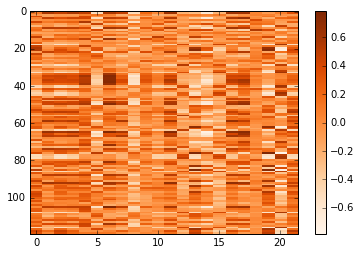

In [137]:
#Creating a heath plot of the correlations
matrix=correlations.as_matrix()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
#plt.imshow(matrix.astype(np.float32))
plt.imshow(matrix.astype(np.float32), interpolation='nearest', cmap=plt.cm.Oranges, 
          aspect='auto') 
plt.colorbar()
plt.show()

In [138]:
#Displaying an example of the correlations between features and
#Number of calls per one call type
correlations.loc['Noise',:]

Median Age                         0.0433477
Median House Value                   0.64903
Median Income                        0.58166
Median Rent                         0.642484
Normalized Com Area                 0.479026
Normalized High school             -0.629029
Normalized Off Area                 0.752524
Normalized PHD                      0.576085
Normalized Res Area                -0.471781
Normalized Ret Area                 0.242247
Normalized asian only              0.0888577
Normalized bachelors                0.748026
Normalized black only              -0.282209
Normalized cars                    -0.330457
Normalized familiy household       -0.730479
Normalized hispanic only           -0.264803
Normalized masters                  0.707372
Normalized non-family household     0.730479
Normalized other only              0.0712176
Normalized owner ocuppied          -0.134229
Normalized renter ocuppied          0.134229
Normalized white only               0.401326
Name: Nois

In [139]:
correlations.loc['Sidewalk Condition',:]

Median Age                           0.14795
Median House Value                  0.621006
Median Income                       0.570771
Median Rent                         0.576227
Normalized Com Area                 0.485029
Normalized High school             -0.503303
Normalized Off Area                 0.611013
Normalized PHD                      0.490733
Normalized Res Area                -0.475143
Normalized Ret Area                 0.197896
Normalized asian only              0.0615644
Normalized bachelors                0.679669
Normalized black only               -0.27596
Normalized cars                    -0.218171
Normalized familiy household       -0.608688
Normalized hispanic only           -0.339149
Normalized masters                  0.685192
Normalized non-family household     0.608688
Normalized other only               0.079525
Normalized owner ocuppied          -0.001389
Normalized renter ocuppied          0.001389
Normalized white only               0.464029
Name: Side